___
# Ciência dos Dados - PROJETO 1

## Rafael Vieira Rosenzvaig
___

## A Internet virou uma prioridade no Brasil?

___
## Introdução

Durante as últimas décadas, a internet no Brasil veio se difundindo casa vez mais, de modo que mais de 50% (TIC domicílios 2014) dos domicílios brasileiros já tem acesso à internet. Porém, será que a internet tem sido algo que os brasileiros passaram a priorizar mais que outros meios de comunicação, como a televisão, telefone fixo, entre outros? Ou seja, será que a porcentagem de lares com intenet passou a porcentagem de lares com meios de comunicação mais tradicionais como a tv, rádio, telefone, entre outros?

Artigos relacionados:
http://g1.globo.com/tecnologia/noticia/2015/09/pela-1-vez-acesso-internet-chega-50-das-casas-no-brasil-diz-pesquisa.html
https://www.tecmundo.com.br/internet/8949-20-anos-de-internet-no-brasil-aonde-chegamos-.htm
http://www.brasil.gov.br/ciencia-e-tecnologia/2016/09/pesquisa-revela-que-mais-de-100-milhoes-de-brasileiros-acessam-a-internet


___
## Análise e Resultados

In [158]:
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os

In [159]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\MacWin\Documents\Ciencia dos dados\PNAD - Projeto 1


In [160]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

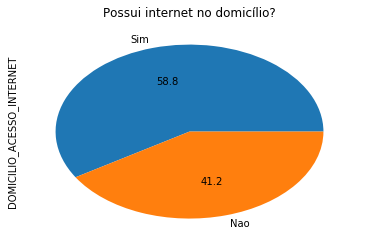

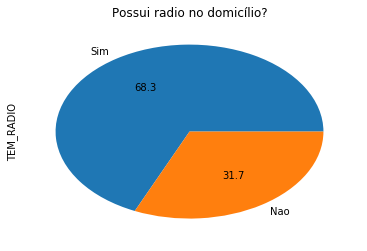

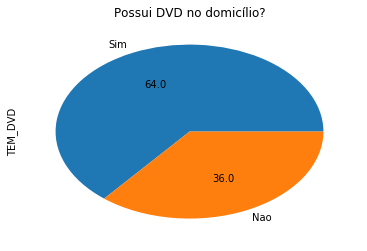

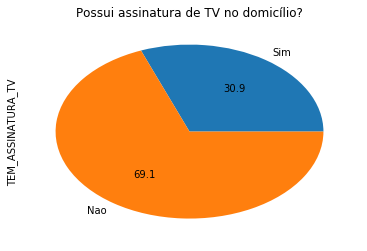

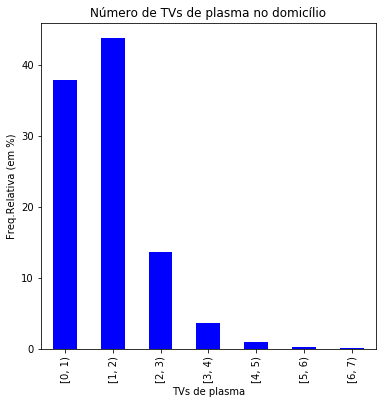

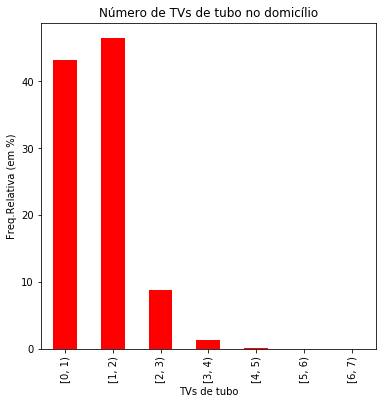

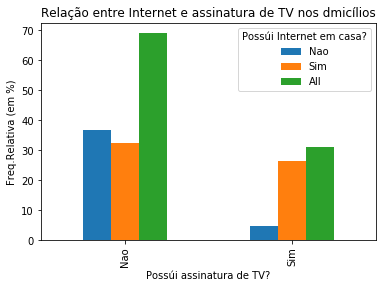

,DOMICILIO_ACESSO_INTERNET,TEM_RADIO,TEM_DVD,NUMERO_TV_PLASMA,NUMERO_TV_TUBO,TEM_ASSINATURA_TV
0,Nao,Nao,Nao,1.0,0.0,Nao
3,Sim,Sim,Sim,1.0,0.0,Nao
5,Sim,Sim,Nao,0.0,2.0,Nao
6,Nao,Sim,Nao,0.0,1.0,Nao
7,Nao,Sim,Nao,0.0,1.0,Nao
8,Sim,Nao,Sim,1.0,0.0,Nao
10,Sim,Nao,Nao,1.0,0.0,Sim
11,Sim,Sim,Sim,1.0,1.0,Nao
13,Sim,Nao,Nao,1.0,0.0,Nao
15,Sim,Nao,Sim,1.0,0.0,Nao


In [178]:
#2015 
dados = pd.read_csv('DOM2015.csv',sep=",")
#Internet
dados.V02322 = dados.V02322.astype('category')
dados.loc[(dados.V02322 == 2),"DOMICILIO_ACESSO_INTERNET"] = "Sim"
dados.loc[(dados.V02322 == 4),"DOMICILIO_ACESSO_INTERNET"] = "Nao"
#Radio
dados.V0225 = dados.V0225.astype('category')
dados.loc[(dados.V0225 == 1),"TEM_RADIO"] = "Sim"
dados.loc[(dados.V0225 == 3),"TEM_RADIO"] = "Nao"
#DVD
dados.V2027 = dados.V2027.astype('category')
dados.loc[(dados.V2027 == 1),"TEM_DVD"] = "Sim"
dados.loc[(dados.V2027 == 3),"TEM_DVD"] = "Nao"
#TV de Plasma
for i in range(0,11):
    dados.loc[(dados.V02270 == i),"NUMERO_TV_PLASMA"] = int(i)
#TV de Tubo
for i in range(0,11):
    dados.loc[(dados.V02271 == i),"NUMERO_TV_TUBO"] = int(i)
#Assinatura de TV
dados.V02272 = dados.V02272.astype('category')
dados.loc[(dados.V02272 == 1),"TEM_ASSINATURA_TV"] = "Sim"
dados.loc[(dados.V02272 == 3),"TEM_ASSINATURA_TV"] = "Nao"

#TABELA
tabela = pd.concat([dados.DOMICILIO_ACESSO_INTERNET,dados.TEM_RADIO,dados.TEM_DVD,dados.NUMERO_TV_PLASMA,dados.NUMERO_TV_TUBO,dados.TEM_ASSINATURA_TV], axis=1)
tabela = tabela.dropna()

#GRAFICO 1 - Freq. Relativa Internet
acessoInter = (tabela.DOMICILIO_ACESSO_INTERNET.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoInter.plot(kind='pie',title='Possui internet no domicílio?',autopct='%.1f')
plt.show()

#GRAFICO 2 - Freq. Relativa Radio
acessoRadio = (tabela.TEM_RADIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoRadio.plot(kind='pie',title='Possui radio no domicílio?',autopct='%.1f')
plt.show()

#GRAFICO 3 - Freq. Relativa DVD
acessoDvd = (tabela.TEM_DVD.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoDvd.plot(kind='pie',title='Possui DVD no domicílio?',autopct='%.1f')
plt.show()

#GRAFICO 4 - Freq. Relativa TV
acessoTV = (tabela.TEM_ASSINATURA_TV.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoTV.plot(kind='pie',title='Possui assinatura de TV no domicílio?',autopct='%.1f')
plt.show()

# Tabelas univariada - TV de plasma
faixa = np.arange(0,8,1)
plasma = pd.cut(tabela.NUMERO_TV_PLASMA, bins=faixa, right=False)
TVplasma = (plasma.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = TVplasma.plot(kind='bar',title='Número de TVs de plasma no domicílio',figsize=(6, 6),color=('b'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('TVs de plasma')
plt.show()

# Tabelas univariada - TV de tubo
faixa = np.arange(0,8,1)
tubo = pd.cut(tabela.NUMERO_TV_TUBO, bins=faixa, right=False)
TVtubo = (tubo.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = TVtubo.plot(kind='bar',title='Número de TVs de tubo no domicílio',figsize=(6, 6),color=('r'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('TVs de tubo')
plt.show()

#Tabela cruzada - TEM INTERNET x TEM ASSINATURA TV
crossINTERNET_ASS=pd.crosstab(dados.TEM_ASSINATURA_TV, dados.DOMICILIO_ACESSO_INTERNET, margins=True, rownames=['Possúi assinatura de TV?'], colnames=['Possúi Internet em casa?'], normalize=True)*100
plot = crossINTERNET_ASS.iloc[0:2].plot(kind='bar', title='Relação entre Internet e assinatura de TV nos dmicílios')
plt.ylabel('Freq.Relativa (em %)')
plt.show()

#
tabela.to_csv('Projeto1_v2_Rafael.csv', sep=',')
#tabela[(dados.DOMICILIO_ACESSO_INTERNET == "Sim") | (dados.DOMICILIO_ACESSO_INTERNET == "Nao")]
tabela
#porcent = pd.Series([acessoInter["Sim"], acessoRadio["Sim"], acessoDvd["Sim"], acessoTV["Sim"]],[acessoInter["Nao"], acessoRadio["Nao"], acessoDvd["Nao"], acessoTV["Nao"]])
#porcent


___
## Conclusão 

Descreva aqui suas conclusões!